<a href="https://colab.research.google.com/github/Shivzz07/Titanic/blob/main/Titanic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#inline plotting
%matplotlib inline

#seaborn plots
sns.set_style('whitegrid')

In [39]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv')


In [40]:
#initial Data Exploration
print("first 5 rows (head) :")
print(titanic_data.head())

first 5 rows (head) :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [41]:
print("Last 5 rows (tail):")
print(titanic_data.tail)

Last 5 rows (tail):
<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                 

In [42]:
#statistical summary
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [43]:
#dataset info
print(titanic_data.info())
#if you want to manually check how many entries
print("Number of data entries (rows):",len(titanic_data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Number of data entries (rows): 891


In [44]:
#Data cleaning
print("Missing value per column:")
print(titanic_data.isnull().sum())

Missing value per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


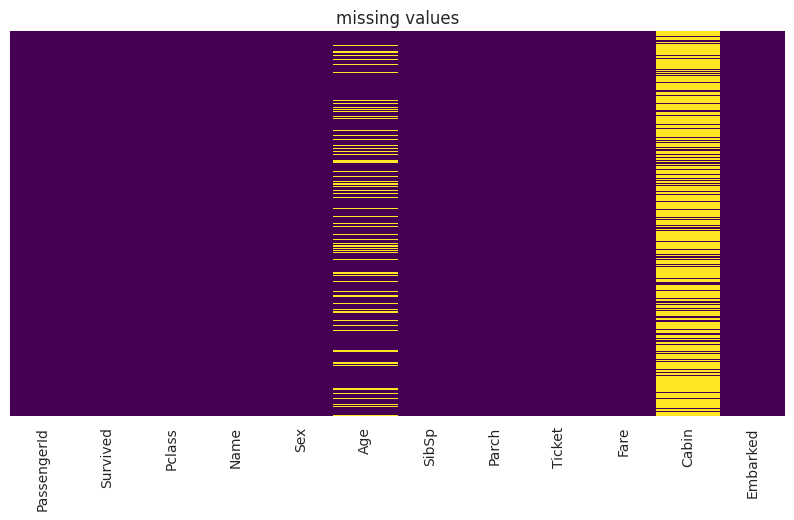

In [45]:
#visualize the missing value
plt.figure(figsize=(10,5))
sns.heatmap(titanic_data.isnull(), yticklabels =False , cbar =False ,cmap ='viridis')
plt.title("missing values")
plt.show()

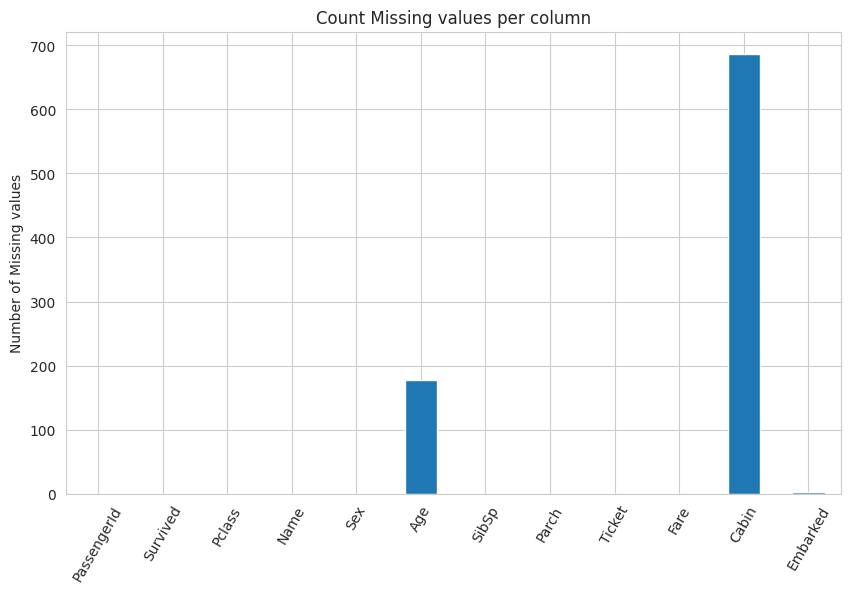

In [46]:
#visualize using bar plot
plt.figure(figsize=(10,6))
titanic_data.isnull().sum().plot(kind='bar')
plt.title("Count Missing values per column")
plt.ylabel("Number of Missing values")
plt.xticks(rotation = 60)
plt.show()

In [47]:
#dealing with missing values
titanic_data.drop('Cabin',axis=1,inplace=True)
median_age = titanic_data['Age'].median()
titanic_data['Age'].fillna(median_age,inplace=True)

mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'].fillna(mode_embarked,inplace=True)

<ipython-input-47-634e72c80e5f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(median_age,inplace=True)
<ipython-input-47-634e72c80e5f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [48]:
print("Missing value per column:")
print(titanic_data.isnull().sum())

Missing value per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [49]:
print("first 5 rows (head) :")
print(titanic_data.head())


first 5 rows (head) :
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


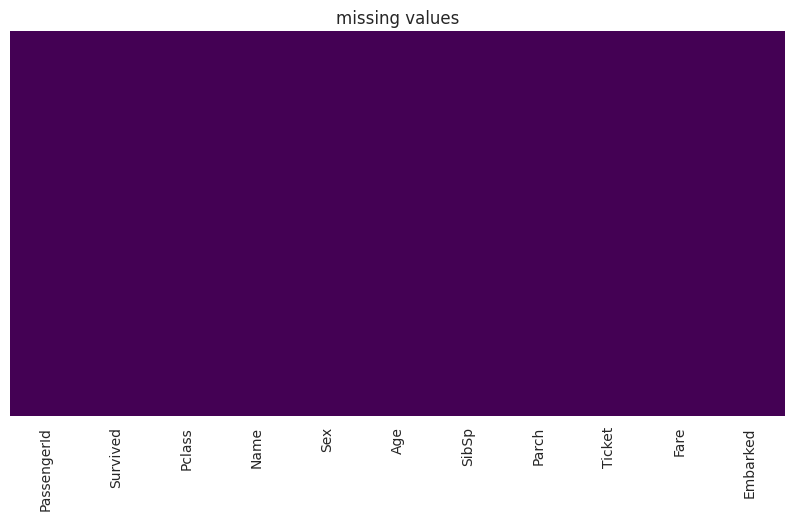

In [50]:
#visualize the missing value after re-calculating the missing values
plt.figure(figsize=(10,5))
sns.heatmap(titanic_data.isnull(), yticklabels =False , cbar =False ,cmap ='viridis')
plt.title("missing values")
plt.show()

In [51]:
#data preprocessing (Categorical Variables)
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0,'female':1})
embareked_dummies = pd.get_dummies(titanic_data['Embarked'],prefix='Embarked')
titanic_data = pd.concat([titanic_data,embareked_dummies],axis=1)
titanic_data.drop('Embarked',axis=1,inplace=True)

#display
print("Dataset after preprocessing")
print(titanic_data.head())

Dataset after preprocessing
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                              Heikkinen, Miss Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False       False        True  
1          PC 17599  71.2833        True       False       False  
2  STON/O2. 3101282   7.9250       False       False        True  


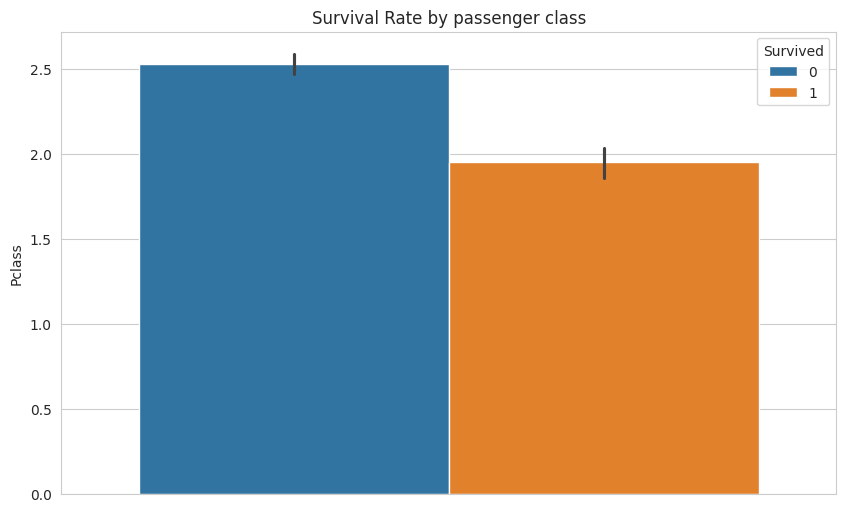

In [55]:
#data visualization
#class vs survival

plt.figure(figsize=(10,6))
sns.barplot(y='Pclass',hue='Survived',data=titanic_data)
plt.title("Survival Rate by passenger class")
plt.show()

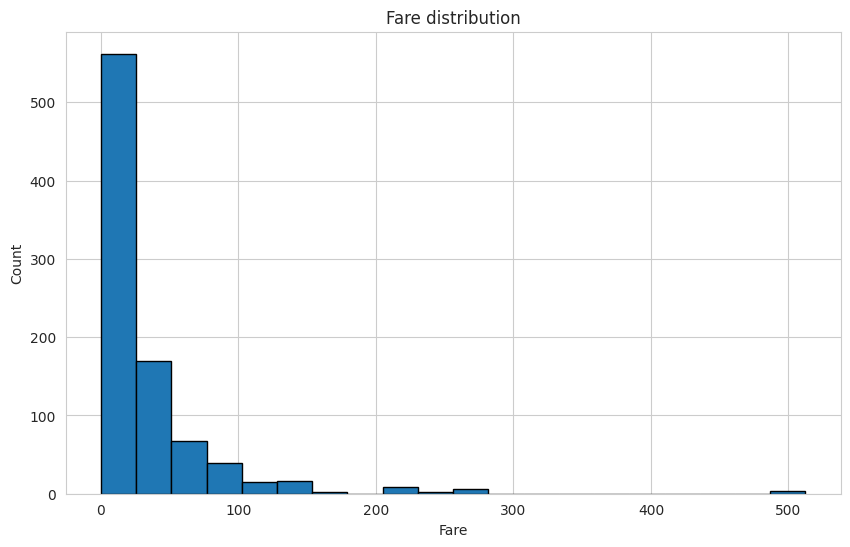

In [58]:

#fare distribution
plt.figure(figsize=(10,6))
titanic_data['Fare'].plot(kind='hist',bins=20,edgecolor='black')
plt.title("Fare distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

Hw : Age Distribution (visualization)


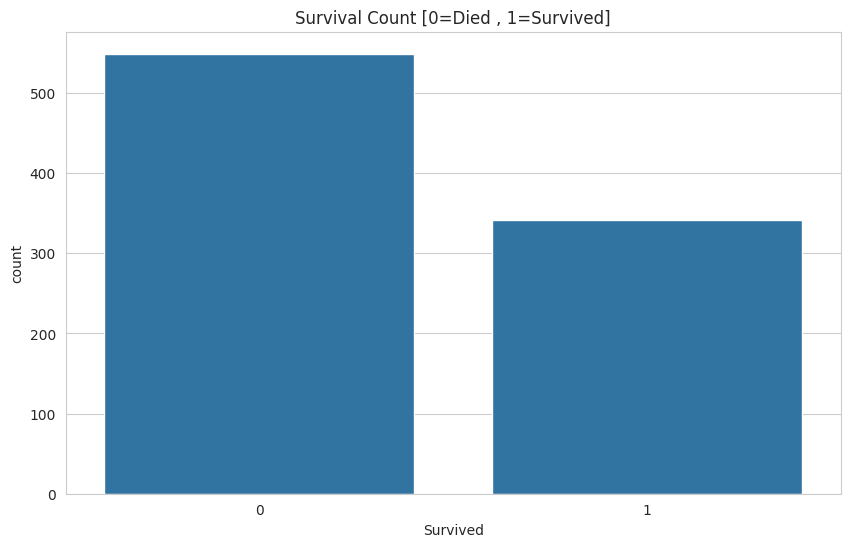

In [59]:
#survival count
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=titanic_data)
plt.title("Survival Count [0=Died , 1=Survived]")
plt.show()

HW : Gender Breakdown , 0-male , 1-female

In [63]:
#co-relation analysis


In [64]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
!cp /content/drive/MyDrive/Titanic_Analysis.ipynb

cp: missing destination file operand after '/content/drive/MyDrive/Titanic_Analysis.ipynb'
Try 'cp --help' for more information.
